In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dental/train'
valid_path = '/content/drive/MyDrive/Dental/valid'

In [ ]:
train_path

'/content/drive/MyDrive/Dental/train'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dental/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Dental/train/L',
 '/content/drive/MyDrive/Dental/train/K',
 '/content/drive/MyDrive/Dental/train/J',
 '/content/drive/MyDrive/Dental/train/G',
 '/content/drive/MyDrive/Dental/train/F',
 '/content/drive/MyDrive/Dental/train/H',
 '/content/drive/MyDrive/Dental/train/I',
 '/content/drive/MyDrive/Dental/train/E',
 '/content/drive/MyDrive/Dental/train/A',
 '/content/drive/MyDrive/Dental/train/C',
 '/content/drive/MyDrive/Dental/train/B',
 '/content/drive/MyDrive/Dental/train/D']

In [ ]:
xV3 = Flatten()(inception.output)

In [ ]:
predictionV3 = Dense(len(folders), activation='softmax')(xV3)

# create a model object
modelV3 = Model(inputs=inception.input, outputs=predictionV3)

In [ ]:
# view the structure of the model
modelV3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
modelV3.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dental/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 120 images belonging to 12 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dental/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 59 images belonging to 12 classes.


In [ ]:
r = modelV3.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
8/8 [==============================] - 46s 5s/step - loss: 18.5796 - accuracy: 0.1417 - val_loss: 16.6800 - val_accuracy: 0.2203
Epoch 2/20
8/8 [==============================] - 24s 3s/step - loss: 11.9802 - accuracy: 0.2250 - val_loss: 8.2193 - val_accuracy: 0.4407
Epoch 3/20
8/8 [==============================] - 22s 3s/step - loss: 8.0203 - accuracy: 0.4750 - val_loss: 5.6493 - val_accuracy: 0.5932
Epoch 4/20
8/8 [==============================] - 21s 3s/step - loss: 4.9352 - accuracy: 0.5583 - val_loss: 4.5566 - val_accuracy: 0.5932
Epoch 5/20
8/8 [==============================] - 22s 3s/step - loss: 2.6309 - accuracy: 0.6167 - val_loss: 1.4831 - val_accuracy: 0.7119
Epoch 6/20
8/8 [==============================] - 21s 3s/step - loss: 2.8409 - accuracy: 0.6333 - val_loss: 0.2079 - val_accuracy: 0.9322
Epoch 7/20
8/8 [==============================] - 21s 3s/step - loss: 1.1243 - accuracy: 0.8083 - val_loss: 0.0978 - val_accuracy: 0.9661
Epoch 8/20
8/8 [===============

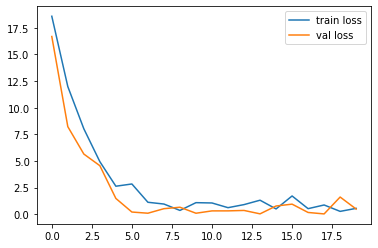

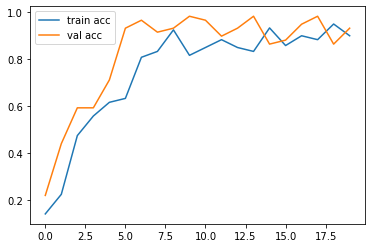

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#VGG16

In [ ]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
xVGG16 = Flatten()(vgg16.output)

In [ ]:
predictionVGG16 = Dense(len(folders), activation='softmax')(xVGG16)

In [ ]:
modelVGG16 = Model(inputs=vgg16.input, outputs=predictionVGG16)

In [ ]:
modelVGG16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
modelVGG16.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
rVGG16 = modelVGG16.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
8/8 [==============================] - 95s 12s/step - loss: 3.7177 - accuracy: 0.0750 - val_loss: 3.2187 - val_accuracy: 0.2203
Epoch 2/20
8/8 [==============================] - 94s 13s/step - loss: 2.6217 - accuracy: 0.2583 - val_loss: 1.9845 - val_accuracy: 0.2881
Epoch 3/20
8/8 [==============================] - 94s 12s/step - loss: 2.2059 - accuracy: 0.2583 - val_loss: 1.4651 - val_accuracy: 0.4915
Epoch 4/20
8/8 [==============================] - 94s 12s/step - loss: 1.6561 - accuracy: 0.4417 - val_loss: 1.0841 - val_accuracy: 0.6610
Epoch 5/20
8/8 [==============================] - 95s 12s/step - loss: 1.3474 - accuracy: 0.5583 - val_loss: 0.8978 - val_accuracy: 0.7797
Epoch 6/20
8/8 [==============================] - 94s 13s/step - loss: 1.2865 - accuracy: 0.5500 - val_loss: 0.6573 - val_accuracy: 0.8136
Epoch 7/20
8/8 [==============================] - 92s 12s/step - loss: 0.9956 - accuracy: 0.7167 - val_loss: 0.4967 - val_accuracy: 0.9322
Epoch 8/20
8/8 [===========

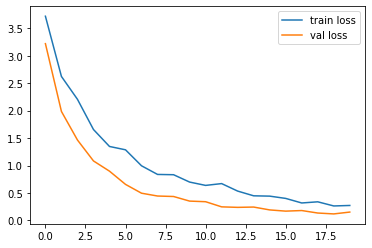

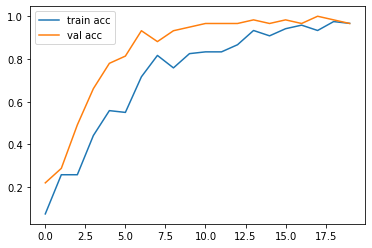

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(rVGG16.history['loss'], label='train loss')
plt.plot(rVGG16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(rVGG16.history['accuracy'], label='train acc')
plt.plot(rVGG16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#Resnet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet50.layers:
  layer.trainable = False

In [ ]:
xres50 = Flatten()(resnet50.output)

In [ ]:
predictionRES50 = Dense(len(folders), activation='softmax')(xres50)

In [ ]:
modelRES50 = Model(inputs=resnet50.input, outputs=predictionRES50)

In [ ]:
modelRES50.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
modelRES50.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
rresnet50 = modelRES50.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
8/8 [==============================] - 113s 14s/step - loss: 14.5005 - accuracy: 0.0667 - val_loss: 16.8700 - val_accuracy: 0.0847
Epoch 2/20
8/8 [==============================] - 31s 4s/step - loss: 11.7706 - accuracy: 0.0917 - val_loss: 8.2035 - val_accuracy: 0.0847
Epoch 3/20
8/8 [==============================] - 29s 4s/step - loss: 5.8435 - accuracy: 0.0833 - val_loss: 4.8168 - val_accuracy: 0.1864
Epoch 4/20
8/8 [==============================] - 29s 4s/step - loss: 5.0808 - accuracy: 0.1250 - val_loss: 3.6995 - val_accuracy: 0.1017
Epoch 5/20
8/8 [==============================] - 29s 4s/step - loss: 4.0417 - accuracy: 0.1333 - val_loss: 4.3498 - val_accuracy: 0.1186
Epoch 6/20
8/8 [==============================] - 31s 4s/step - loss: 3.9849 - accuracy: 0.1500 - val_loss: 4.0889 - val_accuracy: 0.1017
Epoch 7/20
8/8 [==============================] - 29s 4s/step - loss: 3.9084 - accuracy: 0.1167 - val_loss: 3.3650 - val_accuracy: 0.1695
Epoch 8/20
8/8 [=============

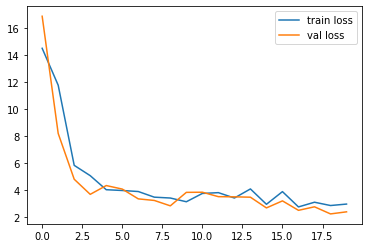

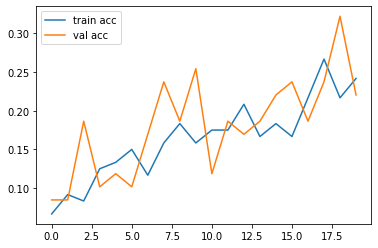

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(rresnet50.history['loss'], label='train loss')
plt.plot(rresnet50.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(rresnet50.history['accuracy'], label='train acc')
plt.plot(rresnet50.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#Xception

In [ ]:
from tensorflow.keras.applications.xception import Xception

In [ ]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in xception.layers:
  layer.trainable = False

In [ ]:
xxception = Flatten()(xception.output)

In [ ]:
predictionXCEP = Dense(len(folders), activation='softmax')(xxception)

In [ ]:
modelXCEP = Model(inputs=xception.input, outputs=predictionXCEP)

In [ ]:
modelXCEP.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
modelXCEP.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
rXCEP = modelXCEP.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
8/8 [==============================] - 38s 5s/step - loss: 10.3231 - accuracy: 0.1083 - val_loss: 9.5367 - val_accuracy: 0.2712
Epoch 2/20
8/8 [==============================] - 39s 5s/step - loss: 7.1837 - accuracy: 0.2667 - val_loss: 4.6344 - val_accuracy: 0.5085
Epoch 3/20
8/8 [==============================] - 36s 5s/step - loss: 3.8587 - accuracy: 0.5083 - val_loss: 3.1876 - val_accuracy: 0.5593
Epoch 4/20
8/8 [==============================] - 34s 4s/step - loss: 3.2735 - accuracy: 0.5250 - val_loss: 1.7579 - val_accuracy: 0.6271
Epoch 5/20
8/8 [==============================] - 34s 4s/step - loss: 1.9810 - accuracy: 0.6750 - val_loss: 1.1781 - val_accuracy: 0.7627
Epoch 6/20
8/8 [==============================] - 35s 5s/step - loss: 2.3097 - accuracy: 0.6833 - val_loss: 0.4818 - val_accuracy: 0.9153
Epoch 7/20
8/8 [==============================] - 37s 5s/step - loss: 1.2083 - accuracy: 0.7750 - val_loss: 0.9213 - val_accuracy: 0.8305
Epoch 8/20
8/8 [=================

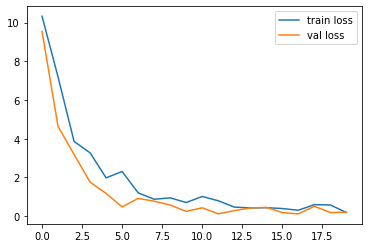

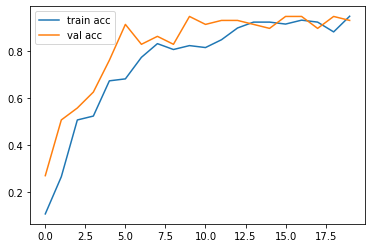

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(rXCEP.history['loss'], label='train loss')
plt.plot(rXCEP.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(rXCEP.history['accuracy'], label='train acc')
plt.plot(rXCEP.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#Densenet 201

In [ ]:
from tensorflow.keras.applications import DenseNet201

In [ ]:
Dense201 = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

74850304/74836368 [==============================] - 0s 0us/step


In [ ]:
for layer in Dense201.layers:
  layer.trainable = False

In [ ]:
xDense201 = Flatten()(Dense201.output)

In [ ]:
predictionDense201 = Dense(len(folders), activation='softmax')(xDense201)

In [ ]:
modelDense201 = Model(inputs=Dense201.input, outputs=predictionDense201)

In [ ]:
modelDense201.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_4[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
modelDense201.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
rDense201 = modelDense201.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
8/8 [==============================] - 56s 6s/step - loss: 16.0685 - accuracy: 0.0750 - val_loss: 11.4741 - val_accuracy: 0.2881
Epoch 2/20
8/8 [==============================] - 43s 6s/step - loss: 10.3236 - accuracy: 0.2083 - val_loss: 4.6881 - val_accuracy: 0.4915
Epoch 3/20
8/8 [==============================] - 40s 5s/step - loss: 6.0451 - accuracy: 0.3833 - val_loss: 2.2681 - val_accuracy: 0.6949
Epoch 4/20
8/8 [==============================] - 48s 6s/step - loss: 2.6667 - accuracy: 0.6250 - val_loss: 1.4735 - val_accuracy: 0.7288
Epoch 5/20
8/8 [==============================] - 40s 5s/step - loss: 1.9985 - accuracy: 0.7583 - val_loss: 0.8529 - val_accuracy: 0.8136
Epoch 6/20
8/8 [==============================] - 40s 5s/step - loss: 2.2399 - accuracy: 0.7000 - val_loss: 0.8852 - val_accuracy: 0.8644
Epoch 7/20
8/8 [==============================] - 42s 5s/step - loss: 1.0063 - accuracy: 0.7750 - val_loss: 0.4861 - val_accuracy: 0.8814
Epoch 8/20
8/8 [===============

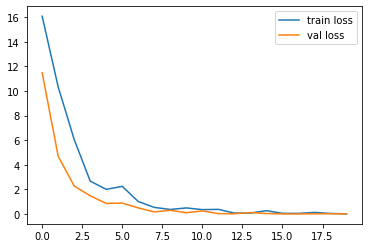

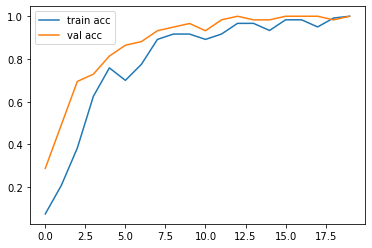

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(rDense201.history['loss'], label='train loss')
plt.plot(rDense201.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(rDense201.history['accuracy'], label='train acc')
plt.plot(rDense201.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#EfficientNetB7

In [ ]:
from tensorflow.keras.applications import EfficientNetB7

In [ ]:
EfficientNetB7 = EfficientNetB7(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

258088960/258076736 [==============================] - 1s 0us/step


In [ ]:
for layer in EfficientNetB7.layers:
  layer.trainable = False

In [ ]:
xEfficientNetB7 = Flatten()(EfficientNetB7.output)

In [ ]:
predictionEfficientNetB7 = Dense(len(folders), activation='softmax')(xEfficientNetB7)

In [ ]:
modelB7 = Model(inputs=EfficientNetB7.input, outputs=predictionEfficientNetB7)

In [ ]:
modelB7.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']    

In [ ]:
modelB7.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
rB7 = modelB7.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
8/8 [==============================] - 103s 10s/step - loss: 74.8942 - accuracy: 0.0917 - val_loss: 96.3227 - val_accuracy: 0.0847
Epoch 2/20
8/8 [==============================] - 95s 13s/step - loss: 94.5851 - accuracy: 0.0750 - val_loss: 64.8754 - val_accuracy: 0.0678
Epoch 3/20
8/8 [==============================] - 88s 12s/step - loss: 52.9183 - accuracy: 0.1083 - val_loss: 55.4598 - val_accuracy: 0.0847
Epoch 4/20
8/8 [==============================] - 79s 10s/step - loss: 45.8262 - accuracy: 0.1000 - val_loss: 36.7934 - val_accuracy: 0.0847
Epoch 5/20
8/8 [==============================] - 75s 10s/step - loss: 47.2399 - accuracy: 0.0417 - val_loss: 42.6055 - val_accuracy: 0.0847
Epoch 6/20
8/8 [==============================] - 72s 9s/step - loss: 39.5303 - accuracy: 0.1083 - val_loss: 57.0660 - val_accuracy: 0.0847
Epoch 7/20
8/8 [==============================] - 73s 10s/step - loss: 43.2427 - accuracy: 0.0500 - val_loss: 40.5086 - val_accuracy: 0.0847
Epoch 8/20
8/

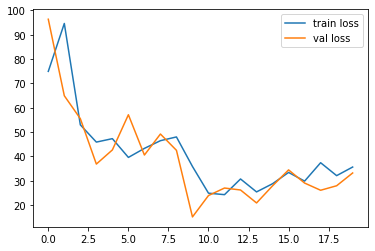

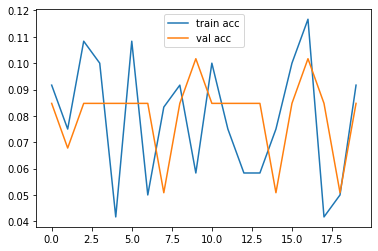

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(rB7.history['loss'], label='train loss')
plt.plot(rB7.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(rB7.history['accuracy'], label='train acc')
plt.plot(rB7.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')